<a href="https://colab.research.google.com/github/e-evarela/DataJour/blob/main/ATHENSVOICE_ENOIKIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [ ]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [ ]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13166     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13167  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13168      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13169       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13170          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13166  0.0      0.0       1.0    0.0  
13167  0.0      0.0       0.0    0.0  
13168  0.0      0.0       0.0    0.0  
13169  0.0      0.0       0.0    0.0  
13170  0.0      0.0       0.0    0.0

In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [ ]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13157  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13158      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13159       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13160          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13156  0.0      0.0       1.0    0.0  
13157  0.0      0.0       0.0    0.0  
13158  0.0      0.0       0.0    0.0  
13159  0.0      0.0       0.0    0.0  
13160  0.0      0.0       0.0    0.0

**Εισαγωγή της βιβλιοθήκης spacy για να έχουμε δυνατότητες nlp**

In [ ]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 79.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
airbnb_df = pd.read_csv("/content/drive/MyDrive/DataJour/Articles_AthensVoice_enoikia.csv")
# airbnb_df = pd.read_csv(data_csv_url)

In [ ]:
airbnb_df

article_url  \
0   https://www.athensvoice.gr/epikairotita/politi...   
1   https://www.athensvoice.gr/epikairotita/ellada...   
2   https://www.athensvoice.gr/epikairotita/politi...   
3   https://www.athensvoice.gr/viral/trending-now/...   
4   https://www.athensvoice.gr/epikairotita/koinon...   
..                                                ...   
79  https://www.athensvoice.gr/epikairotita/politi...   
80  https://www.athensvoice.gr/epikairotita/ellada...   
81  https://www.athensvoice.gr/politismos/eikastik...   
82  https://www.athensvoice.gr/epikairotita/ellada...   
83  https://www.athensvoice.gr/epikairotita/politi...   

                                                title        date      time  \
0   Πιερρακάκης: Δεν θα παίρνουν την επιστροφή ενο...  2025-06-11  10:02:00   
1   Ελλάδα προς ενοικίαση: Η τουριστικοποίηση σαρώ...  2025-06-09  05:09:52   
2   Επιστροφή ενοικίου κάθε Νοέμβριο με βάση το ηλ...  2025-06-06  13:41:40   
3   Info Diet | Σπίτι ΙΙ: Δεν ελπίζω τίποτα, δεν φ...  2025-06-04  15:05:08   
4   Έκρηξη στη Θεσσαλονίκη: Συνελήφθη στην Αττική ...  2025-05-07  17:57:20   
..                                                ...         ...       ...   
79  Ο Ντράγκι διαφώνησε ανοικτά με την Λαγκάρντ γι...  2022-06-10  04:45:00   
80                        Κατοικίες: Ενοίκιο Vs Αγορά  2022-05-31  09:27:00   
81  Το Ίδρυμα Ωνάση αποκαθιστά την Οικία Καβάφη στ...  2022-04-29  13:57:00   
82  Μέσω του gov.gr οι αιτήσεις για την ενιαία ενί...  2022-04-11  18:36:00   
83  Η ενοχική εμμονή, η επιλεκτική μνήμη και η φιλ...  2022-03-30  15:58:07   

                 section                 author  \
0   Πολιτικη & Οικονομια               Newsroom   
1                 Ελλαδα       Λουκάς Βελιδάκης   
2   Πολιτικη & Οικονομια               Newsroom   
3           Trending Now  Σταυρούλα Παναγιωτάκη   
4               Κοινωνια               Newsroom   
..                   ...                    ...   
79  Πολιτικη & Οικονομια               Newsroom   
80                Ελλαδα              A.V. Team   
81             Εικαστικα              A.V. Team   
82                Ελλαδα               Newsroom   
83  Πολιτικη & Οικονομια       Νίκος Γεωργιάδης   

                                              excerpt  \
0   Πιερρακάκης: Δεν θα παίρνουν την επιστροφή ενο...   
1   Ο υπερτουρισμός που μας διώχνει: Μια ολόκληρη ...   
2   Αυτόματα και χωρίς αίτηση θα πιστωθούν τα χρήμ...   
3   Info-diet: Τα συν και πλην της εβδομάδας από τ...   
4   Συνελήφθη στην Αττική ο 36χρονος που σχετίζετα...   
..                                                ...   
79  Η πρόεδρος της ΕΚΤ Κριστίν Λαγκάρντ, ο προκάτο...   
80  Απαντήσεις στο δίλημμα «αγορά ή ενοικίαση κατο...   
81  Οικία Καβάφη-Αλεξάνδρεια: το Ίδρυμα Ωνάση αναλ...   
82  Μέσω του gov.gr οι αιτήσεις για την ενιαία ενί...   
83  Ο πόλεμος στην Ουκρανία, ο Αλεξάντερ Ντούγκιν ...   

                                             subtitle  \
0   Οι δικαιούχοι της επιστροφής του 1/12 των μισθ...   
1    Τουριστικό «τσουνάμι» σαρώνει Αθήνα και Κυκλάδες   
2   Αυτόματος υπολογισμός από την ΑΑΔΕ - Έως 800 ε...   
3   Τα συν και πλην της εβδομάδας από τη Σταυρούλα...   
4                            Κρυβόταν σε φιλικό σπίτι   
..                                                ...   
79                     Τι υποστήριξε ο «Σούπερ» Μάριο   
80  Ποια είναι τα πλεονεκτήματα και τα μειονεκτήμα...   
81  Ανήμερα της γέννησης και του θανάτου του ποιητ...   
82                     Την Πέμπτη ανοίγει η πλατφόρμα   
83  Η κεκαλυμμένη φιλορωσική στάση μερίδας της Αρι...   

                                            text_body  \
0   Διάταξη που θα προβλέπει ότι όσοι ενοικιαστές ...   
1   Η έκρηξη του τουρισμού αλλάζει το πρόσωπο της ...   
2   Σύμφωνα με το άρθρο 70 του νέο νομοσχεδίου για...   
3   [ + ]\nΚΑΛΟΚΑΙΡΙ 2025\r\n Οι μετεωρολόγοι μάς ...   
4   Συνελήφθη στην Αττική ο 36χρονος που σχετίζετα...   
..                                                ...   
79  Αποστάσεις από την πολ

In [ ]:
airbnb_df = airbnb_df.dropna(subset="date").reset_index(drop=True)
airbnb_df = airbnb_df.dropna(subset="text_body").reset_index(drop=True)
airbnb_df.shape

(84, 10)

In [ ]:
short_airbnb_df = airbnb_df[['date', 'text_body']].rename(columns={'text_body': 'text'})

In [ ]:
short_airbnb_df.tail()

date                                               text
79  2022-06-10  Αποστάσεις από την πολιτική της Κριστίν Λαγκάρ...
80  2022-05-31  Δυναμική επιστροφή στην καθημερινότητα της αγο...
81  2022-04-29  Εκατόν πενήντα εννέα χρόνια από τη γέννηση και...
82  2022-04-11  Μέσω του gov.gr θα πραγματοποιηθεί τη φετινή χ...
83  2022-03-30  Είναι έκδηλη η αμηχανία ικανού αριθμού «αριστε...

In [ ]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(short_airbnb_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [ ]:
wordcount_df.shape

(84, 13161)

In [ ]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [ ]:
wordcount_df[trust_words].sum(axis=1).head(3)

0    14
1    25
2     4
dtype: int64

In [ ]:
short_airbnb_df.head(3)

date                                               text
0  2025-06-11  Διάταξη που θα προβλέπει ότι όσοι ενοικιαστές ...
1  2025-06-09  Η έκρηξη του τουρισμού αλλάζει το πρόσωπο της ...
2  2025-06-06  Σύμφωνα με το άρθρο 70 του νέο νομοσχεδίου για...

In [ ]:
short_airbnb_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_airbnb_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_airbnb_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_airbnb_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_airbnb_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_airbnb_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_airbnb_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_airbnb_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_airbnb_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_airbnb_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [ ]:
short_airbnb_df

date                                               text  anger  \
0   2025-06-11  Διάταξη που θα προβλέπει ότι όσοι ενοικιαστές ...      5   
1   2025-06-09  Η έκρηξη του τουρισμού αλλάζει το πρόσωπο της ...      7   
2   2025-06-06  Σύμφωνα με το άρθρο 70 του νέο νομοσχεδίου για...      4   
3   2025-06-04  [ + ]\nΚΑΛΟΚΑΙΡΙ 2025\r\n Οι μετεωρολόγοι μάς ...      5   
4   2025-05-07  Συνελήφθη στην Αττική ο 36χρονος που σχετίζετα...      3   
..         ...                                                ...    ...   
79  2022-06-10  Αποστάσεις από την πολιτική της Κριστίν Λαγκάρ...      5   
80  2022-05-31  Δυναμική επιστροφή στην καθημερινότητα της αγο...     12   
81  2022-04-29  Εκατόν πενήντα εννέα χρόνια από τη γέννηση και...      4   
82  2022-04-11  Μέσω του gov.gr θα πραγματοποιηθεί τη φετινή χ...      0   
83  2022-03-30  Είναι έκδηλη η αμηχανία ικανού αριθμού «αριστε...     15   

    positive  joy  disgust  surprise  trust  anticipation  sadness  negative  \
0         17    5        8         3     14             5        4        13   
1         48    7       14         9     25            16       12        36   
2          8    0        4         0      4             1        2         5   
3          8    5        3         4      5             5        1         6   
4          4    1        0         3      3             3        0         2   
..       ...  ...      ...       ...    ...           ...      ...       ...   
79         6    3        1         0      5             3        1         9   
80        19    4        8         2     12             8        9        27   
81        31   11        4         4     17            15        2         9   
82         5    0        0         0      2             1        0         1   
83        29    6       10         5     24            19       12        36   

    fear  
0      4  
1     22  
2      4  
3      3  
4      2  
..   ...  
79     6  
80     6  
81     6  
82     1  
83    15  

[84 rows x 12 columns]

In [ ]:
len(short_airbnb_df)

84

In [ ]:
short_airbnb_df = short_airbnb_df.set_index('date')  # Set 'date' as index
short_airbnb_df.index = pd.to_datetime(short_airbnb_df.index)  # Convert index to datetime

# Now resample
resampled = short_airbnb_df[['positive', 'negative', 'anger', 'joy', 'sadness']].resample('D').mean().fillna(0)

/tmp/ipython-input-29-3946525130.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['text'].str.len().resample('3M').mean().plot()


<Axes: xlabel='date'>

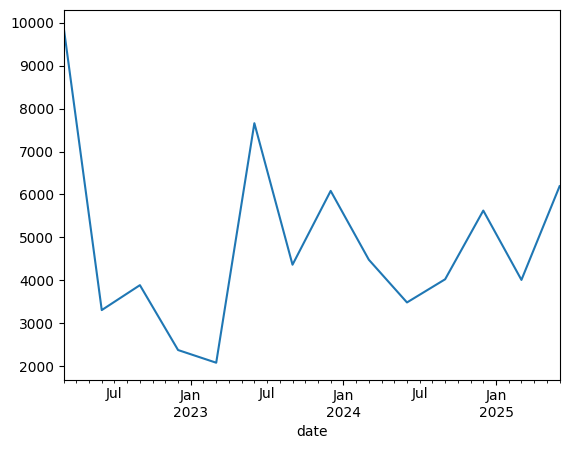

In [ ]:
short_airbnb_df['text'].str.len().resample('3M').mean().plot()

/tmp/ipython-input-30-1820397299.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['text'].resample('6M').count().plot(kind='barh', color='blue')


<Axes: ylabel='date'>

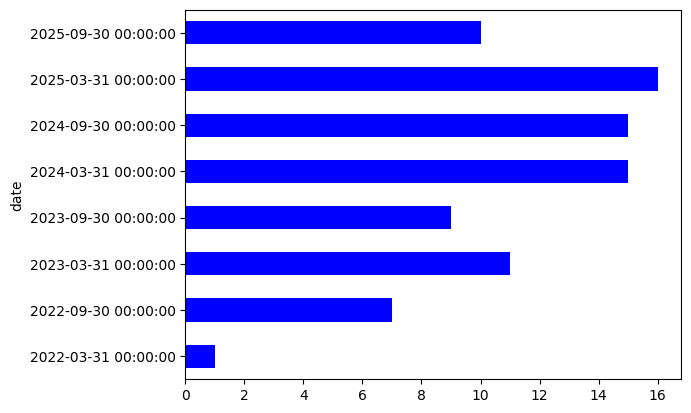

In [ ]:
short_airbnb_df['text'].resample('6M').count().plot(kind='barh', color='blue')

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [ ]:
#plt.style.use('classic')
plt.style.use('ggplot')
#plt.style.use('Solarize_Light2')
#plt.style.use('seaborn-v0_8-bright')

/tmp/ipython-input-33-175908563.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax = short_airbnb_df['positive'].resample('3M').mean().plot(figsize=(16,4),
/tmp/ipython-input-33-175908563.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['negative'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/tmp/ipython-input-33-175908563.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['trust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/tmp/ipython-input-33-175908563.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['disgust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/tmp/ipython-input-33-175908563.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' inst

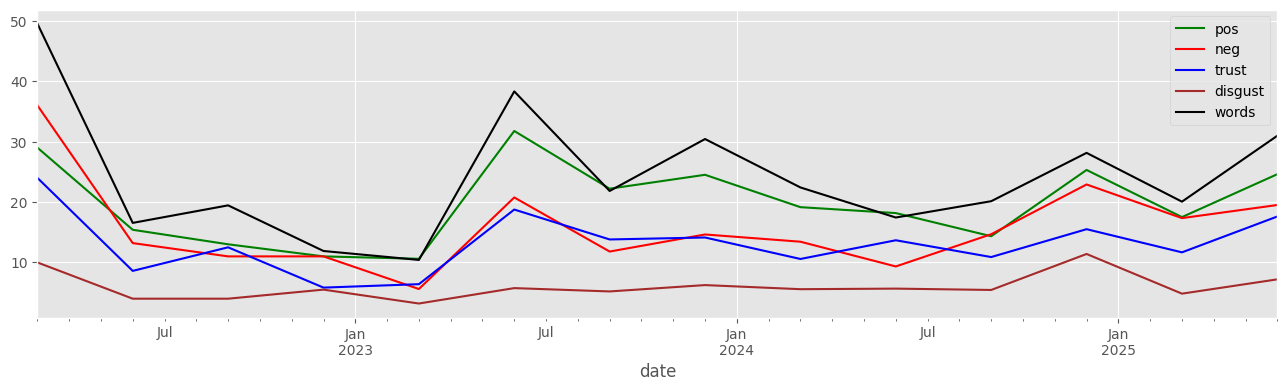

In [ ]:
ax = short_airbnb_df['positive'].resample('3M').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_airbnb_df['negative'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_airbnb_df['trust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_airbnb_df['disgust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_airbnb_df['text'].str.len().resample('3M').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

In [ ]:
# daily_df = short_airbnb_df.resample('3M').mean().fillna(0)

/tmp/ipython-input-35-75750340.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['pos/neg'].resample('3M').mean().plot(figsize=(16,4))


<Axes: xlabel='date'>

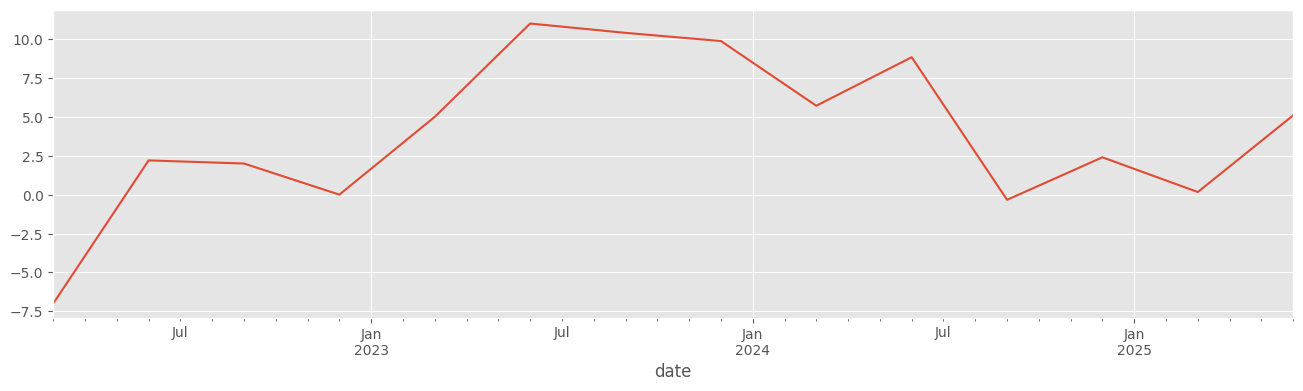

In [ ]:
short_airbnb_df['pos/neg'] = short_airbnb_df['positive'] - short_airbnb_df['negative']
short_airbnb_df['pos/neg'].resample('3M').mean().plot(figsize=(16,4))

In [ ]:
#plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

/tmp/ipython-input-37-2136036587.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean().plot(kind='bar',
/tmp/ipython-input-37-2136036587.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  color=(short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean()>0


<Axes: xlabel='date'>

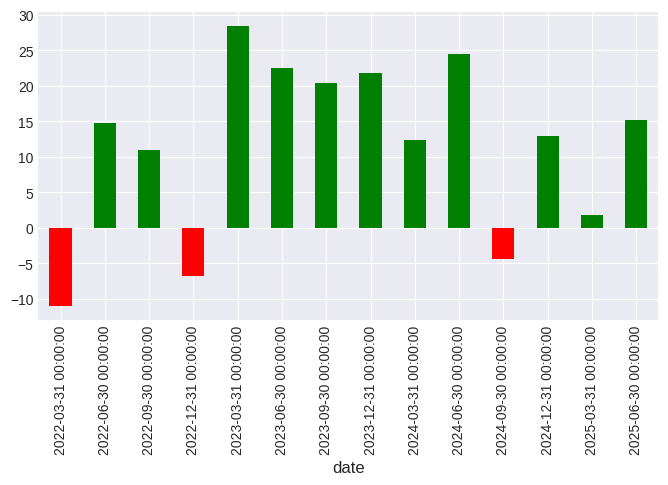

In [ ]:
short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] = short_airbnb_df.positive*100//short_airbnb_df[['positive','negative']].sum(
        axis=1) - short_airbnb_df.negative*100//short_airbnb_df[['positive','negative']].sum(axis=1)

short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean().plot(kind='bar',
                                                                               color=(short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

/tmp/ipython-input-38-2877103554.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  col: short_airbnb_df[col].resample('3M').mean()


<Axes: xlabel='date'>

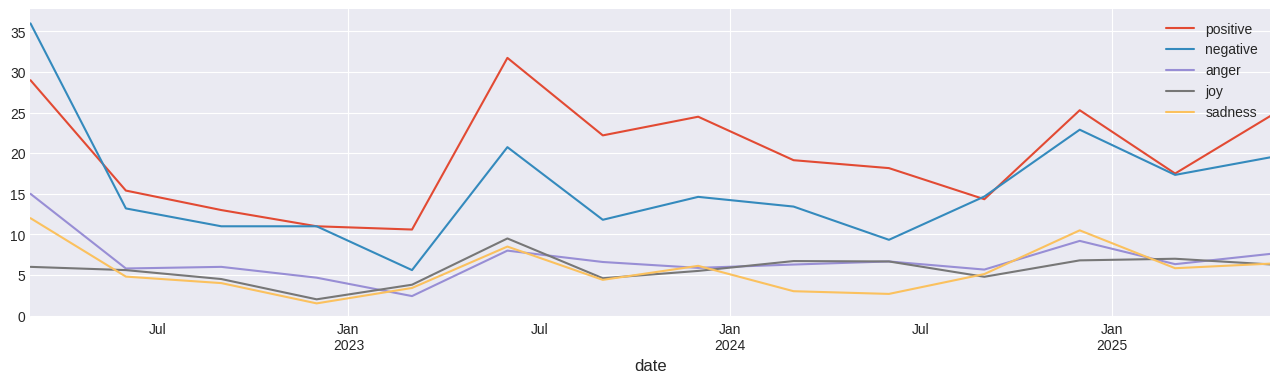

In [ ]:
# List of emotion columns
emotion_cols = ['positive', 'negative', 'anger', 'joy', 'sadness']  # add your columns here

# Resample each and combine
resampled = pd.DataFrame({
    col: short_airbnb_df[col].resample('3M').mean()
    for col in emotion_cols
})

# Plot all lines on one figure
resampled.plot(figsize=(16,4), kind='line')

In [ ]:
short_airbnb_df[
    (short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] == short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
    (short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] == short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].min())
][['positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

positive  negative  (-)αρνητικότητα | θετικότητα(+)
date                                                           
2024-04-11        21         3                               75
2022-10-24         0         1                             -100

In [ ]:
text = airbnb_df['text_body'].str.cat(sep = ' ')

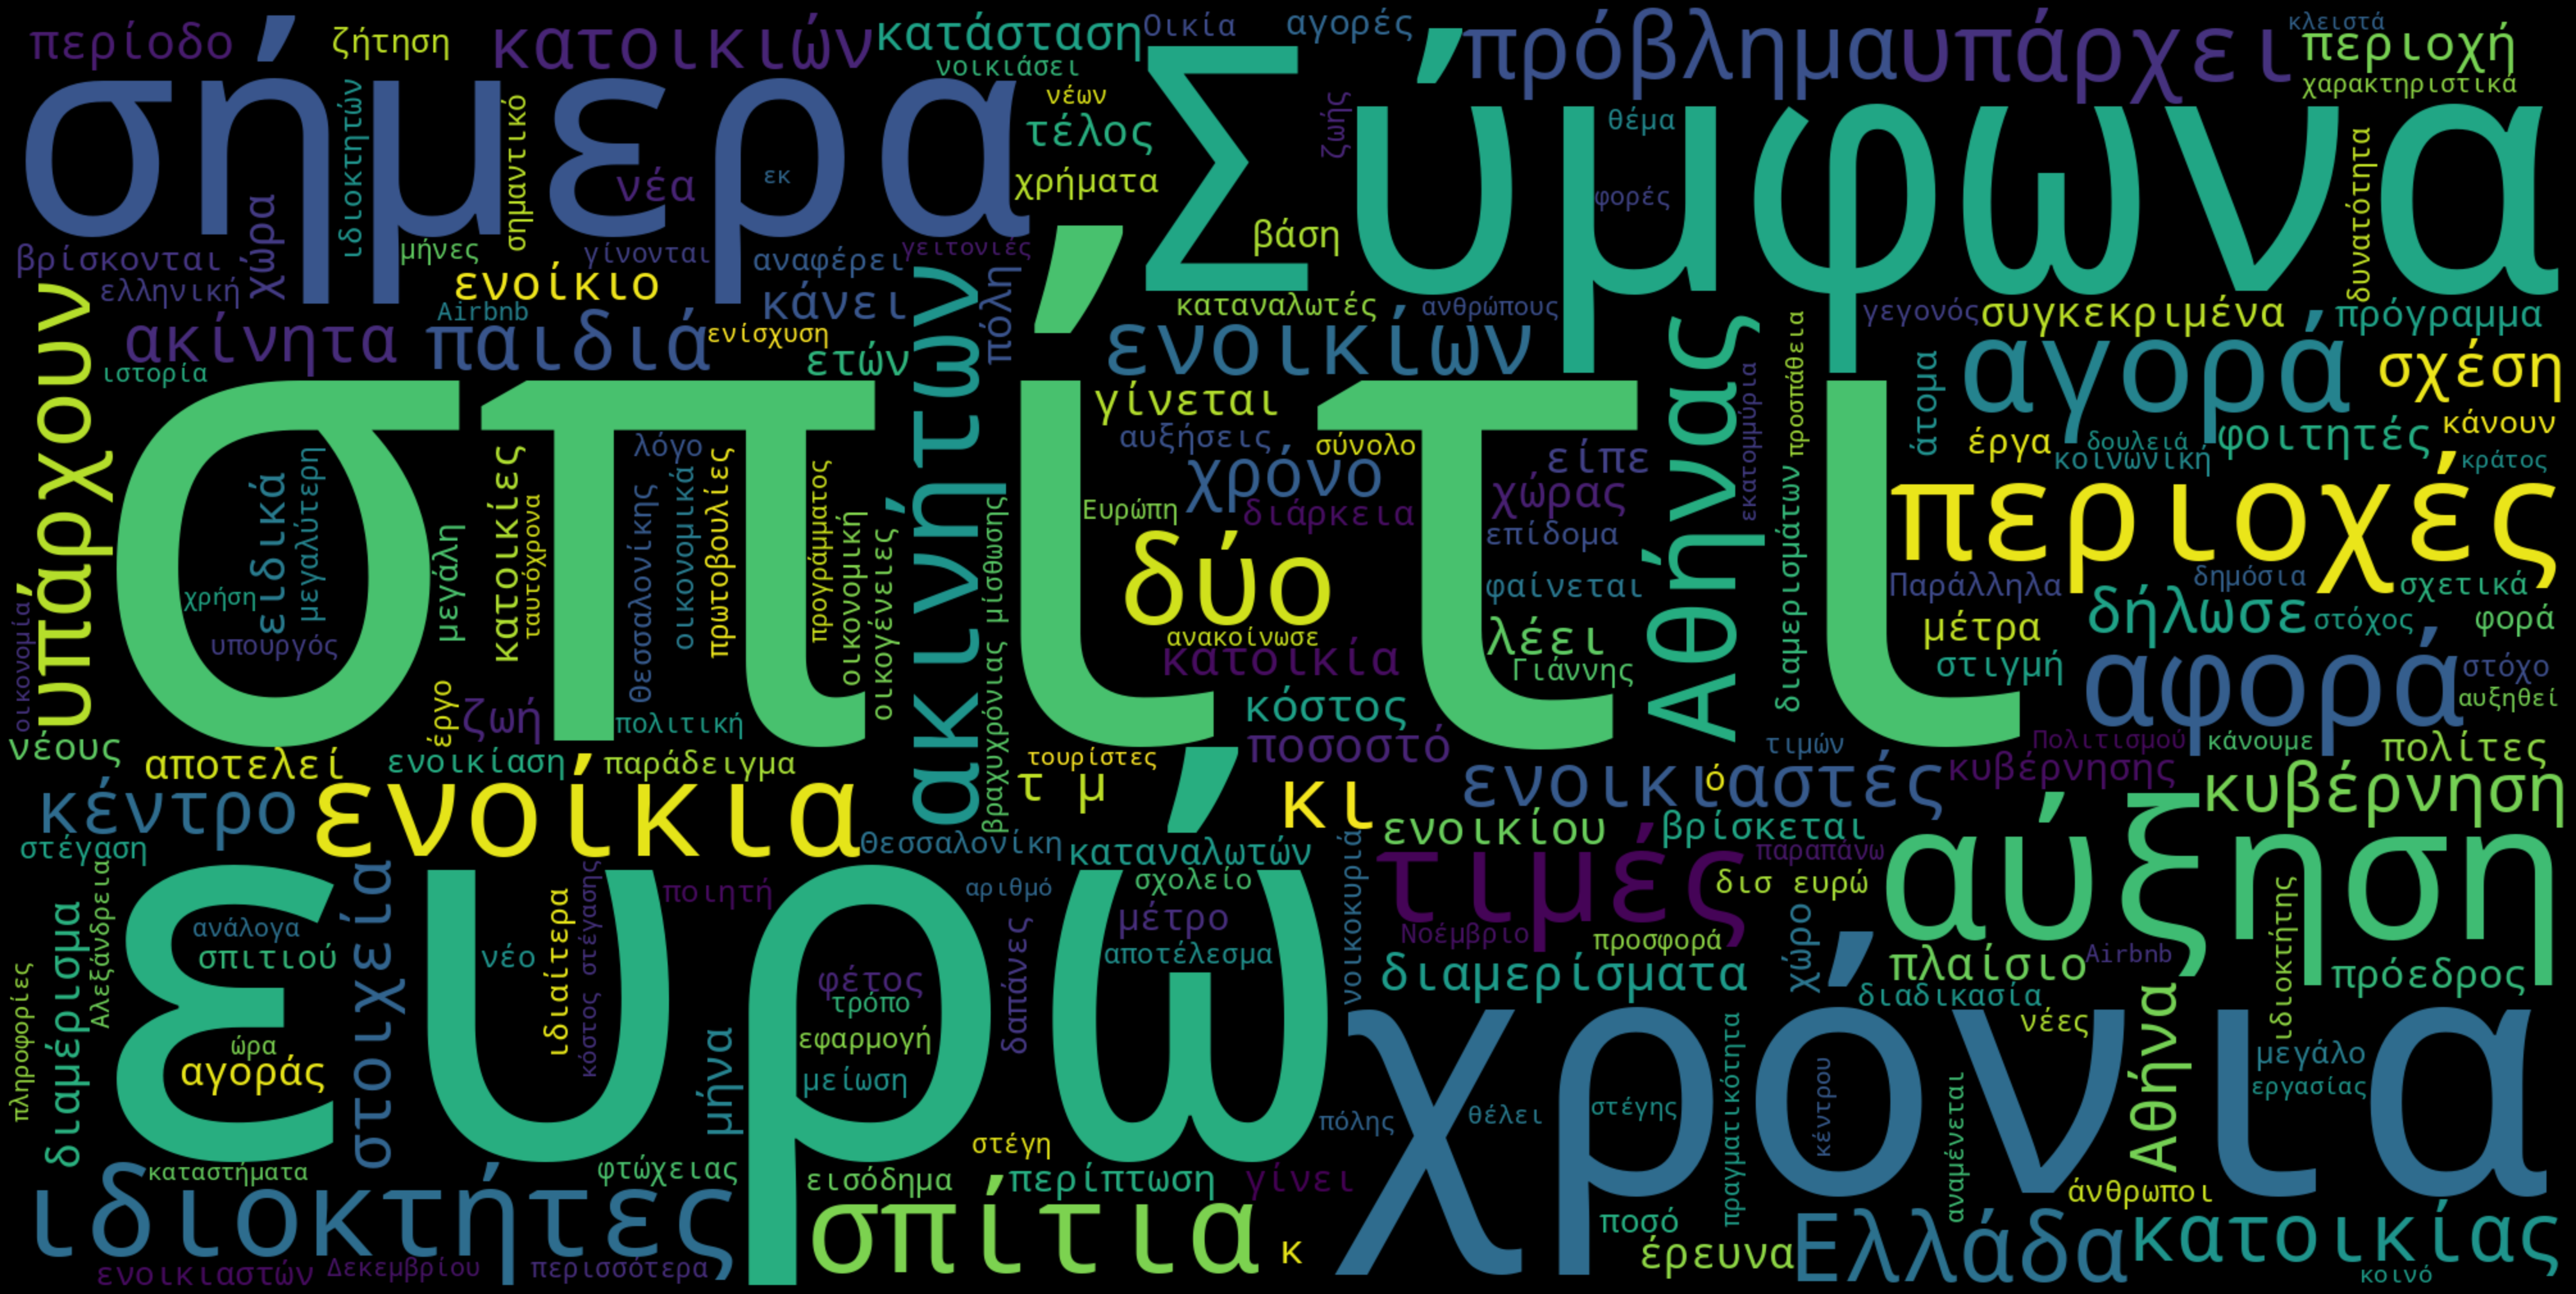

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud1 = WordCloud()
extra_stopwords = {'ή'}
all_stopwords = nlp.Defaults.stop_words.union(extra_stopwords)

wordcloud1 = WordCloud(
    stopwords=all_stopwords,
    width=2000,
    height=1000,
    background_color='black'
).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud1, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
mask = short_airbnb_df['text'].str.contains(r'Airbnb|airbnb|AIRBNB', na=False)
print(short_airbnb_df[mask])

                                                         text  anger  \
date                                                                   
2025-06-09  Η έκρηξη του τουρισμού αλλάζει το πρόσωπο της ...      7   
2025-04-25  Σε ερωτήματα που του έθεσαν πολίτες μέσω Insta...     14   
2025-01-25  «Generation Rent» Ένας όρος που περιγράφει την...     11   
2024-09-15  Διπλή στόχευση αλλά με μία κοινή συνισταμένη, ...      5   
2023-12-08  Η σκηνή από το «Σ’αγαπώ μ’αγαπάς» με τη Δήμητρ...     15   
2023-04-01  Χιλιάδες πολίτες βρέθηκαν σήμερα (1.4) στους δ...      5   

            positive  joy  disgust  surprise  trust  anticipation  sadness  \
date                                                                         
2025-06-09        48    7       14         9     25            16       12   
2025-04-25        47   14       24         4     41            17       15   
2025-01-25        35   13        8         6     28            24       10   
2024-09-15        12    1        

In [ ]:
filtered_df = short_airbnb_df[mask]
filtered_df

text  anger  \
date                                                                   
2025-06-09  Η έκρηξη του τουρισμού αλλάζει το πρόσωπο της ...      7   
2025-04-25  Σε ερωτήματα που του έθεσαν πολίτες μέσω Insta...     14   
2025-01-25  «Generation Rent» Ένας όρος που περιγράφει την...     11   
2024-09-15  Διπλή στόχευση αλλά με μία κοινή συνισταμένη, ...      5   
2023-12-08  Η σκηνή από το «Σ’αγαπώ μ’αγαπάς» με τη Δήμητρ...     15   
2023-04-01  Χιλιάδες πολίτες βρέθηκαν σήμερα (1.4) στους δ...      5   

            positive  joy  disgust  surprise  trust  anticipation  sadness  \
date                                                                         
2025-06-09        48    7       14         9     25            16       12   
2025-04-25        47   14       24         4     41            17       15   
2025-01-25        35   13        8         6     28            24       10   
2024-09-15        12    1        3         0      7             1        6   
2023-12-08        78   17       23        19     38            33       17   
2023-04-01        25    9        5         3     14            13        7   

            negative  fear  pos/neg  (-)αρνητικότητα | θετικότητα(+)  
date                                                                  
2025-06-09        36    22       12                               15  
2025-04-25        37    14       10                               11  
2025-01-25        39    16       -4                               -5  
2024-09-15        13     3       -1                               -4  
2023-12-08        41    22       37                               31  
2023-04-01        22    10        3                                7

In [ ]:
len(filtered_df)

6

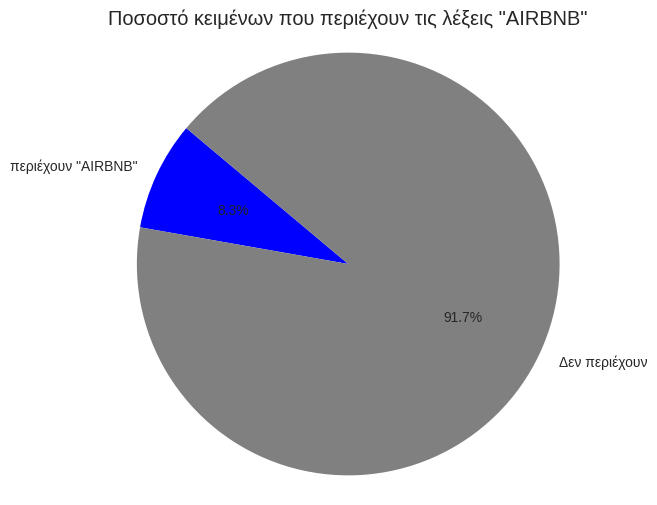

In [ ]:
import matplotlib.pyplot as plt

# Δημιουργία μάσκας
mask = short_airbnb_df['text'].str.contains(r'Airbnb|airbnb|AIRBNB', case=False, na=False)

# Υπολογισμός αριθμών
matching = mask.sum()                   # Πόσες γραμμές καλύπτει η μάσκα (True)
not_matching = len(mask) - matching     # Όσες δεν την καλύπτουν

# Δεδομένα για το pie chart
labels = ['περιέχουν "AIRBNB"', 'Δεν περιέχουν']
sizes = [matching, not_matching]
colors = ['blue', 'gray']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ποσοστό κειμένων που περιέχουν τις λέξεις "AIRBNB"')
plt.axis('equal')  # κάνει τον κύκλο "στρογγυλό"
plt.show()